In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
d = pd.read_csv('./Demenchuk.txt', sep = '	', decimal = ',')
d = d.astype('float')
y = d["y"]
x1 = d["x1"]
x2 = d["x2"]
x3 = d["x3"]
d

,y,x1,x2,x3
1,106.492808,50.451171,27.866614,51.975582
2,104.794562,48.171496,26.020243,51.813055
3,104.180294,48.305067,25.642313,53.772739
4,106.041953,49.192154,26.444598,52.140332
5,106.168625,49.723453,27.965257,52.990834
...,...,...,...,...
296,104.958200,48.767419,26.189664,53.266383
297,104.930741,49.665983,28.591901,51.683172
298,104.160358,49.956601,29.210627,53.910949
299,104.627236,48.149669,26.781977,53.051627


In [4]:
d.dtypes

y     float64
x1    float64
x2    float64
x3    float64
dtype: object

# Отбираем x для парной модели

In [5]:
from matplotlib import pyplot as plt
import numpy as np

### y и x1

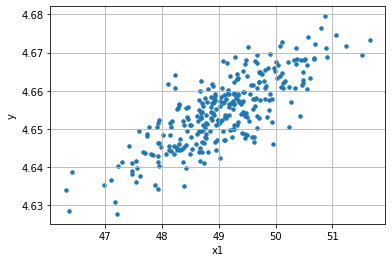

In [6]:
xs = d["x1"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [7]:
x1_corr = np.corrcoef(d["x1"], d["y"])[0, 1]
x1_corr

0.7943230594541699

### y и x2

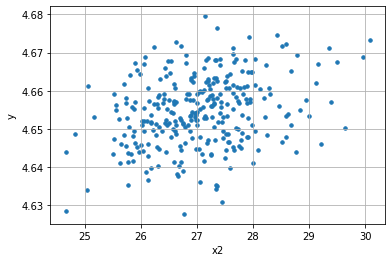

In [8]:
xs = d["x2"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [9]:
x2_corr = np.corrcoef(d["x2"], d["y"])[0, 1]
x2_corr

0.2891332943836466

### y и x3

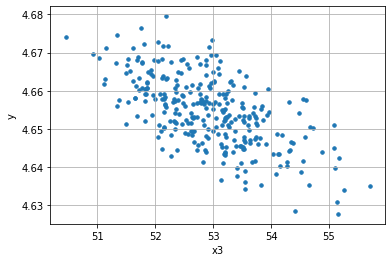

In [10]:
xs = d["x3"]
ys = d["y"].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

In [11]:
x3_corr = np.corrcoef(d["x3"], d["y"])[0, 1]
x3_corr

-0.6223541867469227

In [12]:
print(f"{x1_corr}\n{x2_corr}\n{x3_corr}")

0.7943230594541699
0.2891332943836466
-0.6223541867469227


**Вывод**<br>Наиболее сильная зависимость видна между y и x1. Ее же и берем для построения парной регрессии

In [13]:
import statsmodels.formula.api as sm

# Строим парную модель

In [14]:
m_pair = sm.ols(formula="y ~ x1", data=d)
results_pair = m_pair.fit()
s_pair = results_pair.summary()

df_pair = pd.read_html(s_pair.tables[1].as_html(),header=0,index_col=0)[0]
s_pair

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     509.5
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.82e-66
Time:                        22:05:08   Log-Likelihood:                -265.20
No. Observations:                 300   AIC:                             534.4
Df Residuals:                     298   BIC:                             541.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9454      1.867     33.721      0.000      59.272      66.619
x1             0.8586      0.038     22.572      0.000       0.784       0.933
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.043
Skew:                          -0.029   Prob(JB):                        0.979
Kurtosis:                       3.011   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df_pair

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,62.9454,1.867,33.721,0.0,59.272,66.619
x1,0.8586,0.038,22.572,0.0,0.784,0.933


In [16]:
f_df_pair = pd.read_html(s_pair.tables[0].as_html(),header=0,index_col=0)[0]


### Доверительные интервалы

In [17]:
results_pair.conf_int(0.05)

,0,1
Intercept,59.271896,66.618908
x1,0.783745,0.933464


### Коэфф детерминации R^2

In [18]:
pred_val0 = results_pair.fittedvalues.copy()
true_val0 = d["y"]
e0 = true_val0 - pred_val0

In [19]:
from sklearn.metrics import r2_score
print(r2_score(true_val0,pred_val0))
print(results_pair.rsquared)

0.630949122780633
0.6309491227806332


### Коэфф аппроксимации

In [20]:
A_pair = (1/len(x1))*sum(abs(e0/y))*100
print(A_pair)

0.44519764467181083


### Стандартная ошибка

In [21]:
results_pair.HC0_se

Intercept    1.746932
x1           0.035618
dtype: float64

### Средняя ошибка модели

In [22]:
print(np.sqrt(results_pair.scale))

0.5876653195497306


### Средняя относительная ошибка аппроксимации

In [23]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(true_val0, pred_val0) / true_val0.abs().sum()
mape

1.483828069574788e-05

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='real', ylabel='pred'>

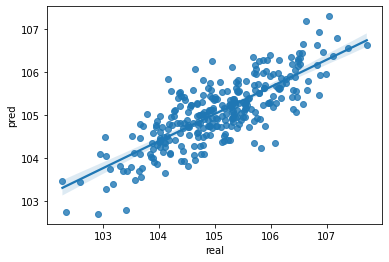

In [25]:
pred0 =pd.DataFrame({
    'real': true_val0,
    'pred': pred_val0
})
sns.regplot(x='real',y='pred',data=pred0)

### Определяем коэффициенты

#### x1

In [26]:
beta_pair_1 = df_pair['coef'].values[1] # Бета коэффициент для x1
delta_pair_1 = x1_corr * beta_pair_1 / results_pair.rsquared # Дельта коэффициент для x1
elastic_pair_1 = beta_pair_1 * x1.mean() / y.mean() # Коэффициент эластичности для x1

In [27]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_pair_1,delta_pair_1,elastic_pair_1))

Beta: 0.8586
Delta: 1.080920401064522
Elastic: 0.40092818208986125


#### Проводим тесты

In [28]:
import statsmodels.stats as smd

import statsmodels.stats.api as sms
#чтобы делать тесты

from statsmodels.compat import lzip
#чтобы делать подписи

In [29]:
residuals = results_pair.resid

#### Тест Дарбина-Ватсона

In [30]:
#DWtest
dw = smd.stattools.durbin_watson(residuals)
dw

1.905788976767814

#### Тест Бреуша-Годфри

In [31]:
#BGtest
name=['Chisq statistic','p-value', 'F statistic','p-value(F)']
bg=sms.acorr_breusch_godfrey(results_pair,nlags=1)
lzip(name,bg)

[('Chisq statistic', 0.6639553707064594),
 ('p-value', 0.4151670118886768),
 ('F statistic', 0.6587738050188571),
 ('p-value(F)', 0.41764317461473877)]

#### Тест Голдфельда-Квандта

In [32]:
#GQtest
name=['F statistic','p-value']
gq=sms.het_goldfeldquandt(residuals,results_pair.model.exog)
print(lzip(name,gq))

[('F statistic', 1.3003110049626083), ('p-value', 0.05564963847943322)]


#### Тест Бреуша-Пагана

In [33]:
#BPtest
name=['BP','p-value']
bp=sms.het_breuschpagan(residuals,results_pair.model.exog)
lzip(name,bp)


[('BP', 0.10604624464211065), ('p-value', 0.744691127246685)]

#### Тест Уайта

In [34]:
#White_test
name=['WT','p-value']
wt=sms.het_white(residuals,results_pair.model.exog)
lzip(name,wt)

[('WT', 0.9611174803200728), ('p-value', 0.618437749245957)]

# Строим множественную модель

#### Общие данные

In [35]:
m_many = sm.ols(formula="y ~ x1 + x2 + x3", data=d)
results_many = m_many.fit()
s_many = results_many.summary()

df_many = pd.read_html(s_many.tables[1].as_html(),header=0,index_col=0)[0]
s_many

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     294.5
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.62e-88
Time:                        22:05:08   Log-Likelihood:                -207.33
No. Observations:                 300   AIC:                             422.7
Df Residuals:                     296   BIC:                             437.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0773      3.195     26.316      0.000      77.790      90.365
x1             0.8811      0.046     19.071      0.000       0.790       0.972
x2            -0.2470      0.040     -6.199      0.000      -0.325      -0.169
x3            -0.2939      0.036     -8.062      0.000      -0.366      -0.222
==============================================================================
Omnibus:                        0.180   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.151
Skew:                           0.055   Prob(JB):                        0.927
Kurtosis:                       2.988   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_many

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,84.0773,3.195,26.316,0.0,77.790,90.365
x1,0.8811,0.046,19.071,0.0,0.790,0.972
x2,-0.2470,0.040,-6.199,0.0,-0.325,-0.169
x3,-0.2939,0.036,-8.062,0.0,-0.366,-0.222


### Доверительные интервалы

In [37]:
results_many.conf_int(0.05)

,0,1
Intercept,77.789619,90.364990
x1,0.790156,0.972003
x2,-0.325427,-0.168593
x3,-0.365680,-0.222179


### Коэфф детерминации R^2

In [38]:
pred_val0 = results_many.fittedvalues.copy()
true_val0 = d["y"]
e0 = true_val0 - pred_val0

In [39]:
from sklearn.metrics import r2_score
print(r2_score(true_val0,pred_val0))
print(results_many.rsquared)

0.749072929524051
0.749072929524051


### Коэфф аппроксимации

In [40]:
A_many = (1/len(x1))*sum(abs(e0/y))*100
print(A_many)

0.364280908658048


### Стандартная ошибка

In [41]:
results_many.HC0_se

Intercept    3.086346
x1           0.045916
x2           0.041713
x3           0.034483
dtype: float64

### Средняя ошибка модели

In [42]:
print(np.sqrt(results_many.scale))

0.4862089799786962


### Средняя относительная ошибка аппроксимации

In [43]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(true_val0, pred_val0) / true_val0.abs().sum()
mape

1.2145296883963929e-05

In [44]:
import seaborn as sns

<AxesSubplot:xlabel='real', ylabel='pred'>

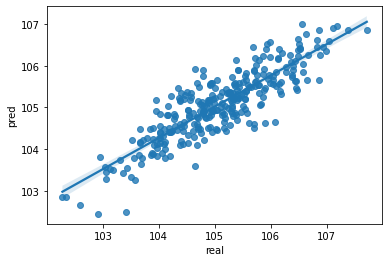

In [45]:
pred0 =pd.DataFrame({
    'real': true_val0,
    'pred': pred_val0
})
sns.regplot(x='real',y='pred',data=pred0)

### Определяем коэффициенты

#### x1

In [46]:
beta_many_1 = df_many['coef'].values[1] # Бета коэффициент для x1
delta_many_1 = x1_corr * beta_many_1 / results_many.rsquared # Дельта коэффициент для x1
elastic_many_1 = beta_many_1 * x1.mean() / y.mean() # Коэффициент эластичности для x1

In [47]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_1,delta_many_1,elastic_many_1))

Beta: 0.8811
Delta: 0.934325644540059
Elastic: 0.41143468581339


#### x2

In [48]:
beta_many_2 = df_many['coef'].values[2] # Бета коэффициент для x2
delta_many_2 = x2_corr * beta_many_2 / results_many.rsquared # Дельта коэффициент для x2
elastic_many_2 = beta_many_2 * x2.mean() / y.mean() # Коэффициент эластичности для x2


In [49]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_2,delta_many_2,elastic_many_2))

Beta: -0.247
Delta: -0.09533907967831282
Elastic: -0.06358371165135798


#### x3

In [50]:
beta_many_3 = df_many['coef'].values[3] # Бета коэффициент для x3
delta_many_3 = x3_corr * beta_many_3 / results_many.rsquared # Дельта коэффициент для x3
elastic_many_3 = beta_many_3 * x3.mean() / y.mean() # Коэффициент эластичности для x3

In [51]:
print("Beta: {}\nDelta: {}\nElastic: {}".format(beta_many_3,delta_many_3,elastic_many_3))

Beta: -0.2939
Delta: 0.24418169216332325
Elastic: -0.14801182178386824


#### Проводим тесты

In [52]:
import statsmodels.stats as smd

import statsmodels.stats.api as sms
#чтобы делать тесты

from statsmodels.compat import lzip
#чтобы делать подписи

In [53]:
residuals = results_many.resid

#### Тест Дарбина-Ватсона

In [67]:
#DWtest
dw = smd.stattools.durbin_watson(residuals)
dw

2.049729017282111

#### Тест Бреуша-Годфри

In [55]:
#BGtest
name=['Chisq statistic','p-value', 'F statistic','p-value(F)']
bg=sms.acorr_breusch_godfrey(results_many,nlags=1)
lzip(name,bg)

[('Chisq statistic', 0.2025085366267665),
 ('p-value', 0.6527036013644745),
 ('F statistic', 0.19926790585624332),
 ('p-value(F)', 0.6556399160818105)]

#### Тест Голдфельда-Квандта

In [56]:
#GQtest
name=['F statistic','p-value']
gq=sms.het_goldfeldquandt(residuals,results_many.model.exog)
print(lzip(name,gq))

[('F statistic', 1.2171191583825145), ('p-value', 0.11818700246350568)]


#### Тест Бреуша-Пагана

In [57]:
#BPtest
name=['BP','p-value']
bp=sms.het_breuschpagan(residuals,results_many.model.exog)
lzip(name,bp)


[('BP', 1.5881276011877277), ('p-value', 0.6620847927391107)]

#### Тест Уайта

In [58]:
#White_test
name=['WT','p-value']
wt=sms.het_white(residuals,results_many.model.exog)
lzip(name,wt)

[('WT', 4.253993560098945), ('p-value', 0.8939141183615693)]

# Сравниваем модели

In [59]:
error_pair = np.sqrt(results_pair.scale)
error_many = np.sqrt(results_many.scale)

In [65]:
f_test = (results_pair.fvalue, results_many.fvalue)
determ = (results_pair.rsquared, results_many.rsquared)
adjust_determ = (results_pair.rsquared_adj, results_many.rsquared_adj)
st_error = (error_pair, error_many)
approx = (A_pair, A_many)

In [66]:
print(f_test)
print(determ)
print(adjust_determ)
print(st_error)
print(approx)

(509.47674208308797, 294.54187189204464)
(0.6309491227806332, 0.749072929524051)
(0.6297106970181521, 0.7465297497557137)
(0.5876653195497306, 0.4862089799786962)
(0.44519764467181083, 0.364280908658048)


**Итоги**: Выигрывает множественная модель по 4 из 5 пунктов

### Коэффициенты с R совпали